### Gaussian Distribution
#### Conditional Gaussian

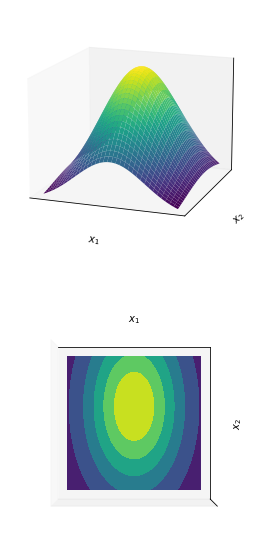

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

# Our 2-dimensional distribution will be over variables X and Y
N = 100
X = np.linspace(-2, 2, N)
Y = np.linspace(-2, 2, N)
X, Y = np.meshgrid(X, Y)

# Mean vector and covariance matrix
mu = np.array([0., 0.5])
Sigma = np.array([[ 1. , 0.5], [-0.5,  3]])

# Pack X and Y into a single 3-dimensional array
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

def multivariate_gaussian(pos, mu, Sigma):
    """Return the multivariate Gaussian distribution on array pos."""

    n = mu.shape[0]
    Sigma_det = np.linalg.det(Sigma)
    Sigma_inv = np.linalg.inv(Sigma)
    N = np.sqrt((2*np.pi)**n * Sigma_det)
    # This einsum call calculates (x-mu)T.Sigma-1.(x-mu) in a vectorized
    # way across all the input variables.
    fac = np.einsum('...k,kl,...l->...', pos-mu, Sigma_inv, pos-mu)

    return np.exp(-fac / 2) / N

# The distribution on the variables X, Y packed into pos.
Z = multivariate_gaussian(pos, mu, Sigma)

# plot using subplots
fig = plt.figure(figsize=[10,10])
ax1 = fig.add_subplot(2,1,1,projection='3d')

ax1.plot_surface(X, Y, Z, rstride=3, cstride=3, linewidth=1, antialiased=True,
                cmap=cm.viridis)
ax1.view_init(15,-70)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_zticks([])
ax1.set_xlabel(r'$x_1$')
ax1.set_ylabel(r'$x_2$')

ax2 = fig.add_subplot(2,1,2,projection='3d')
ax2.contourf(X, Y, Z, zdir='z', offset=0, cmap=cm.viridis)
ax2.view_init(90, 270)

ax2.grid(False)
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_zticks([])
ax2.set_xlabel(r'$x_1$')
ax2.set_ylabel(r'$x_2$')

plt.show()


#### conditional Gaussian and marginal gausssian, we could see mean of p(x1|x2) is a variable depends on the value of x2, shown in subplot 2 with brown band on PRML-P87. p(x2) in subplot 1 is marginal gaussian distribution which described in PRML P90 by equation (2.98)

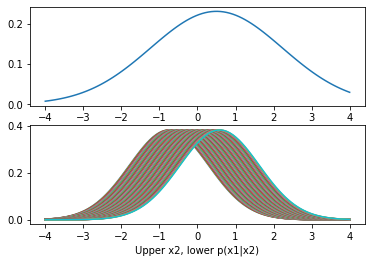

In [2]:
x = np.linspace(-4,4,100)
u2 = 0.5
Cov2 = 3
G2 = 1/(2*np.pi*Cov2)**0.5 * np.exp(-1/(2*Cov2)*(x-u2)**2)

plt.subplot(211)
plt.plot(x,G2)
plt.subplot(212)
for x2 in x: # choose u_cond is linear conbination of u2
    u_cond = 0. + 0.5*1/3*(x2-u2) 
    cov_cond = 1. - 0.5*1/3*(-0.5)
    G_condition = 1/(2*np.pi*cov_cond)**0.5 * np.exp(-1/(2*cov_cond)*(x - u_cond)**2)
    plt.plot(x,G_condition)
    plt.xlabel("Upper x2, lower p(x1|x2)")


### Maximum Likelihood estimation of Gaussian PRML-P94

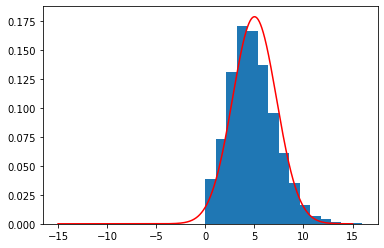

In [3]:
# random data generation using possion distribution, now we are going to fit this dataset by gaussian
data = np.random.poisson(5, 10000)
x = np.linspace(-15,15,1000)
count, bins, ignored = plt.hist(data, 15, density=True)

# compute the maximum likelihood estimation of gaussian parameters of possion data
Mu_ml = data.mean()
Cov_ml = 1/(len(data)-1) * np.array([(xn-Mu_ml)**2 for xn in data]).sum() # unbiased estimation
gau = 1/np.sqrt(2*np.pi*Cov_ml) * np.exp(-1/(2*Cov_ml)*(x-Mu_ml)**2)
plt.plot(x, gau,'-r')
plt.show()

### Student's t-distribution
#### 1. Convolution formulization
#### 2. v to inf, cause a gaussian dis.

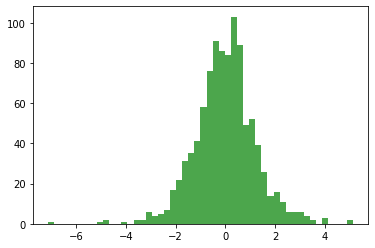

In [75]:
import numpy.random as random
v = 5
a = [random.standard_t(v) for n in range(1000)]
n, bins, patches = plt.hist(a, 50, color='green', alpha=0.7)